- **Nama:** Nabila Alawiyah
- **NPM:** 51422187
- **Kelas:** 3IA21
- **Kelompok PI:** C

# A. Data Preparation

## A.1 Installasi dan Import Library

In [1]:
pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00


In [2]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.7 MB/s eta 0:00:00


In [3]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 16.6 MB/s eta 0:00:00


In [4]:
# Import library untuk pengolahan data dan visualisasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.options.mode.chained_assignment = None
np.random.seed(0)

# Konfigurasi visualisasi dan warning
sns.set()
warnings.filterwarnings('ignore')

# Import library untuk manipulasi teks, waktu, dan data eksternal
import datetime as datetime
import re
import string
import csv
import requests
from io import StringIO
from collections import Counter

# Import library untuk pemrosesan teks
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Import library untuk Bahasa Indonesia
import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Import untuk visualisasi teks
from wordcloud import WordCloud

# Download resource yang dibutuhkan dari NLTK
nltk.download("punkt")
nltk.download('punkt_tab')
nltk.download("stopwords")

# Import library untuk pemodelan dan evaluasi
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    precision_recall_curve,
    auc,
    roc_curve,
    classification_report
)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

# Import untuk penanganan data tidak seimbang
from imblearn.over_sampling import SMOTE  # Handling Imbalanced

# Import library tensorflow untuk deep learning
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

# Import csv
import csv

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## A.2 Data Loading

In [ ]:
#load data hasil scrapping
file_id = '1P7uF6i0wLOK7vKu-c2-zHI-AXtTJ8M_9'
download_url = f'https://drive.google.com/uc?id={file_id}'

# Baca file CSV dari URL
data_scrapping = pd.read_csv(download_url)

# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
data_scrapping.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,e6135886-f9b9-426a-8cff-7afe90716f52,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Suka sih transaksi pakai aplikasi Blu by BCA, ...",3,2,1.63.10,2025-03-25 11:34:42,"Hai, Kak Muhammad Dava Wardhana. Terima kasih ...",2025-03-25 11:59:23,1.63.10
1,4c538f12-7d90-426f-a9ff-58fa48dfde9b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"cukup baik, tolong perbaiki : 1. Tolong beri w...",4,5,1.63.10,2025-04-02 01:55:29,"Hai, Kak Sandi Wahyudi. Maaf atas ketidaknyama...",2025-04-02 02:40:05,1.63.10
2,1a4c92d3-85fb-427a-862a-c1d3a616210d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Baru aja Daftar kemarin, kayaknya sekarang sud...",4,2,1.63.10,2025-04-05 00:06:59,"Hai, Kak Rizky Padilah. Maaf atas ketidaknyama...",2025-04-05 00:57:09,1.63.10
3,07732b95-3c92-4c44-b644-d9474ed88e9e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sudah beberapa kali mau bayar atau mau transfe...,1,4,1.63.10,2025-04-07 07:31:59,"Hai, Kak Revina. Maaf atas ketidaknyamanannya....",2025-04-07 07:52:58,1.63.10
4,5db5e696-a2b5-4286-ab96-601349fd56f4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,secara keseluruhan fitur mantap mudah digunaka...,3,6,1.63.10,2025-03-27 16:57:28,"Hai, Kak Deca. Maaf atas ketidaknyamanannya. K...",2025-03-27 17:15:04,1.63.10


In [ ]:
data_scrapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              20000 non-null  object
 1   userName              20000 non-null  object
 2   userImage             20000 non-null  object
 3   content               20000 non-null  object
 4   score                 20000 non-null  int64 
 5   thumbsUpCount         20000 non-null  int64 
 6   reviewCreatedVersion  17533 non-null  object
 7   at                    20000 non-null  object
 8   replyContent          20000 non-null  object
 9   repliedAt             20000 non-null  object
 10  appVersion            17533 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.7+ MB


In [ ]:
# Menghitung jumlah baris dan kolom
data_scrapping.shape

(20000, 11)

## A.3 Data Cleaning

In [ ]:
# Menyimpan data frame baru dengan menghapus bari yang memiliki missing values
data_model = data_scrapping.dropna()

data_model.shape

(17533, 11)

In [ ]:
#menghapus kolom yang tidak dibutuhkan
data_model =data_model.drop(['reviewId', 'userName', 'userImage','thumbsUpCount', 'reviewCreatedVersion', 'replyContent',
       'repliedAt', 'appVersion','at'], axis=1)
data_model

,content,score
0,"Suka sih transaksi pakai aplikasi Blu by BCA, ...",3
1,"cukup baik, tolong perbaiki : 1. Tolong beri w...",4
2,"Baru aja Daftar kemarin, kayaknya sekarang sud...",4
3,Sudah beberapa kali mau bayar atau mau transfe...,1
4,secara keseluruhan fitur mantap mudah digunaka...,3
...,...,...
19995,nice,5
19996,Oke,5
19997,Ok,5
19998,Good,5


In [ ]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17533 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  17533 non-null  object
 1   score    17533 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 410.9+ KB


In [ ]:
data_model

,content,score
0,"Suka sih transaksi pakai aplikasi Blu by BCA, ...",3
1,"cukup baik, tolong perbaiki : 1. Tolong beri w...",4
2,"Baru aja Daftar kemarin, kayaknya sekarang sud...",4
3,Sudah beberapa kali mau bayar atau mau transfe...,1
4,secara keseluruhan fitur mantap mudah digunaka...,3
...,...,...
19995,nice,5
19996,Oke,5
19997,Ok,5
19998,Good,5


In [ ]:
from IPython.display import FileLink

# Menyimpan data_fix to csv
data_model.to_csv('data_model.csv', index=False)
FileLink('data_model.csv')

/content/data_model.csv

# B. Text Preprocessing

## B.1 Cleaning and Tokenizing

Berikut adalah beberapa fungsi yang digunakan untuk membersihkan dan memproses teks. Inilah penjelasan singkat tentang masing-masing fungsi:

1. `cleaningText(text)`: Fungsi ini digunakan untuk membersihkan teks dengan beberapa langkah, seperti menghapus emoji, hastag, tautan, nomor telpon, angka biasa, dan tanda baca. Selain itu, fungsi ini juga menggantikan karakter newline dengan spasi dan menghilangkan spasi ekstra di awal dan akhir teks.

2. `casefoldingText(text)`: Fungsi ini mengonversi semua karakter dalam teks menjadi huruf kecil (lowercase), sehingga teks menjadi lebih seragam.

3. `tokenizingText(text)`: Fungsi ini digunakan untuk membagi teks menjadi daftar kata atau token. Ini berguna untuk mengurai teks menjadi komponen-komponen dasar.

4. `filteringText(text)`: Fungsi ini digunakan untuk menghapus kata-kata berhenti (stopwords) dalam teks. Anda telah memperbarui daftar kata-kata berhenti dengan beberapa kata tambahan.

5. `stemmingText(text)`: Fungsi ini menerapkan stemming pada teks, yaitu mengurangi kata-kata menjadi bentuk dasarnya. Anda menggunakan pustaka Sastrawi untuk melakukan stemming dalam bahasa Indonesia.

6. `toSentence(list_words)`: Fungsi ini digunakan untuk menggabungkan daftar kata-kata menjadi sebuah kalimat.

In [ ]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal",
              "tpi":"tapi","tp":"tapi","ktolong":"ka tolong","g":"tidak","anjiiiing":"umpat","knp":"kenapa","tibatiba":"tiba-tiba","ad":"ada",
              "tbtb":"tiba-tiba","yt":"youtube","ig":"instagram","gk":"tidak","yg":"yang","moga":"semoga","pake":"pakai","ngirim":"kirim",
              "muas":"puas","sdh":"sudah","lg":"lagi","sya":"saya","klo":"kalau","knpa":"kenapa","tdk":"tidak","sampe":"sampai","kayak":"seperti",
              "cuman":"hanya","prose":"proses","ny":"","jd":"jadi","dgn":"dengan","jg":"juga","tf":"transfer","sampe":"sampai","ngirim":"kirim",
              "bagu":"bagus","skrg":"sekarang","nunggu":"tunggu","udah":"sudah","uda":"sudah","pk":"pakai","@": "di", "abis": "habis", "wtb": "beli",
              "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia",
              "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah",
              "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku",
              "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa",
              "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik",
              "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang",
              "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur",
              "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar",
              "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana",
              "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar",
              "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng",
              "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur",
              "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi",
              "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja",
              "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci",
              "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor",
              "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan",
              "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan",
              "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian",
              "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile",
              "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan",
              "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi",
              "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda",
              "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo",
              "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh",
              "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi",
              "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus",
              "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah",
              "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba",
              "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras",
              "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual",
              "tioghoa": "tionghoa", "faktakta": "fakta", "blue":"blu", "rb":"ribu", "lemot": "lelet", "sohib": "teman", "eror":"error", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}

def normalisasi_slang(teks):
    hasil = []
    for kata in teks.split():
        kata_baru = slangwords.get(kata.lower(), kata)
        hasil.append(kata_baru)
    return ' '.join(hasil)

In [ ]:
import emoji

# Menyusun daftar stopwords (kata-kata umum yang akan diabaikan dalam analisis)
listStopwords = set(stopwords.words('indonesian') + stopwords.words('english'))
listStopwords.update([
    'iya', 'yaa', 'gak', 'nya', 'na', 'sih', 'ku', 'di', 'ga', 'ya',
    'gaa', 'loh', 'kah', 'woi', 'woii', 'woy', 'anjay', 'gk', 'g'
])

def cleaningText(text):
    text = str(text).lower()
    text = emoji.replace_emoji(text, replace='')       # Hapus emoji
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)         # Hapus hashtag
    text = re.sub(r'http\S+', '', text)                # Hapus tautan
    text = re.sub(r'\b(?:\d{1,3}[-.\s]?)?(?:\d{3}[-.\s]?)?\d{4,}\b', '', text)  # Hapus nomor telepon
    text = re.sub(r'\d+', '', text)                    # Hapus angka biasa
    text = re.sub(rf"[{re.escape(string.punctuation)}]", '', text)  # Hilangkan tanda baca
    text = text.replace('_', ' ')  # Ganti underscore dengan spasi
    text = text.replace('-', ' ')  # Ganti minus dengan spasi
    text = re.sub(r'\s+', ' ', text)  # Bersihkan spasi ganda
    return text.strip()

# Fungsi untuk memecah teks menjadi kata-kata dan membuang stopwords
def tokenizingText(text):
    tokens = word_tokenize(text)  # Tokenisasi teks
    tokens = [word for word in tokens if word not in listStopwords]  # Filter stopwords
    return tokens

# Fungsi untuk mengubah daftar kata kembali menjadi satu kalimat
def toSentence(list_words):
    return ' '.join(word for word in list_words)

In [ ]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
data_model['text_clean'] = data_model['content'].apply(cleaningText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
data_model['text_slangwords'] = data_model['text_clean'].apply(normalisasi_slang)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
data_model['text_tokenizingText1'] = data_model['text_slangwords'].apply(tokenizingText)
data_model['text_tokenizingText'] = data_model['text_tokenizingText1'].apply(' '.join) # join word in list
hasil = " ".join(data_model['text_tokenizingText']) # join list in one text


In [ ]:
data_model.head()

,content,score,text_clean,text_slangwords,text_tokenizingText1,text_tokenizingText
0,"Suka sih transaksi pakai aplikasi Blu by BCA, ...",3,suka sih transaksi pakai aplikasi blu by bca c...,suka sih transaksi pakai aplikasi blu by bca c...,"[suka, transaksi, pakai, aplikasi, blu, bca, k...",suka transaksi pakai aplikasi blu bca kekurang...
1,"cukup baik, tolong perbaiki : 1. Tolong beri w...",4,cukup baik tolong perbaiki tolong beri waktu l...,cukup baik tolong perbaiki tolong beri waktu l...,"[tolong, perbaiki, tolong, user, aplikasi, blu...",tolong perbaiki tolong user aplikasi blu detik...
2,"Baru aja Daftar kemarin, kayaknya sekarang sud...",4,baru aja daftar kemarin kayaknya sekarang suda...,baru saja daftar kemarin kayaknya sekarang sud...,"[daftar, kemarin, kayaknya, perubahan, berat, ...",daftar kemarin kayaknya perubahan berat lelet ...
3,Sudah beberapa kali mau bayar atau mau transfe...,1,sudah beberapa kali mau bayar atau mau transfe...,sudah beberapa kali mau bayar atau mau transfe...,"[kali, bayar, transfer, aplikasi, buka, stack,...",kali bayar transfer aplikasi buka stack halama...
4,secara keseluruhan fitur mantap mudah digunaka...,3,secara keseluruhan fitur mantap mudah digunaka...,secara keseluruhan fitur mantap mudah digunaka...,"[fitur, mantap, mudah, kekurangannya, aplikasi...",fitur mantap mudah kekurangannya aplikasinya l...


In [ ]:
# Menyimpan data_fix to csv
data_model.to_csv('data_cleaning.csv', index=False)
FileLink('data_cleaning.csv')

/content/data_cleaning.csv

## B.2 Stemming

In [ ]:
# create stemmer and process stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
from tqdm import tqdm

#menyimpan hasil stemming di kolom stemmed
stem_cache = {}

def stemmingText(word):
    if word not in stem_cache:
        stem_cache[word] = stemmer.stem(word)
    return stem_cache[word]

tqdm.pandas()

data_model["stemmed"] = data_model["text_tokenizingText1"].progress_apply(
    lambda words: [stemmingText(word) for word in words]
)

data_model.head()

100%|██████████| 17533/17533 [22:07<00:00, 13.21it/s]


,content,score,text_clean,text_slangwords,text_tokenizingText1,text_tokenizingText,stemmed
0,"Suka sih transaksi pakai aplikasi Blu by BCA, ...",3,suka sih transaksi pakai aplikasi blu by bca c...,suka sih transaksi pakai aplikasi blu by bca c...,"[suka, transaksi, pakai, aplikasi, blu, bca, k...",suka transaksi pakai aplikasi blu bca kekurang...,"[suka, transaksi, pakai, aplikasi, blu, bca, k..."
1,"cukup baik, tolong perbaiki : 1. Tolong beri w...",4,cukup baik tolong perbaiki tolong beri waktu l...,cukup baik tolong perbaiki tolong beri waktu l...,"[tolong, perbaiki, tolong, user, aplikasi, blu...",tolong perbaiki tolong user aplikasi blu detik...,"[tolong, baik, tolong, user, aplikasi, blu, de..."
2,"Baru aja Daftar kemarin, kayaknya sekarang sud...",4,baru aja daftar kemarin kayaknya sekarang suda...,baru saja daftar kemarin kayaknya sekarang sud...,"[daftar, kemarin, kayaknya, perubahan, berat, ...",daftar kemarin kayaknya perubahan berat lelet ...,"[daftar, kemarin, kayak, ubah, berat, lelet, a..."
3,Sudah beberapa kali mau bayar atau mau transfe...,1,sudah beberapa kali mau bayar atau mau transfe...,sudah beberapa kali mau bayar atau mau transfe...,"[kali, bayar, transfer, aplikasi, buka, stack,...",kali bayar transfer aplikasi buka stack halama...,"[kali, bayar, transfer, aplikasi, buka, stack,..."
4,secara keseluruhan fitur mantap mudah digunaka...,3,secara keseluruhan fitur mantap mudah digunaka...,secara keseluruhan fitur mantap mudah digunaka...,"[fitur, mantap, mudah, kekurangannya, aplikasi...",fitur mantap mudah kekurangannya aplikasinya l...,"[fitur, mantap, mudah, kurang, aplikasi, lelet..."


In [ ]:
#kata yang sudah di stemming disatukan menjadi satu kalimat dan mengubah tipe objt ke str pada text akhir
data_model["text_akhir"] = data_model["stemmed"].apply(lambda x: " ".join([item for item in x]))
data_model['text_akhir'] = data_model['text_akhir'].astype('str')
data_model['text_akhir']= data_model['text_akhir'].astype(pd.StringDtype())
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17533 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   content               17533 non-null  object
 1   score                 17533 non-null  int64 
 2   text_clean            17533 non-null  object
 3   text_slangwords       17533 non-null  object
 4   text_tokenizingText1  17533 non-null  object
 5   text_tokenizingText   17533 non-null  object
 6   stemmed               17533 non-null  object
 7   text_akhir            17533 non-null  string
dtypes: int64(1), object(6), string(1)
memory usage: 1.2+ MB


In [ ]:
from IPython.display import FileLink

# Menyimpan data_fix to csv
data_model.to_csv('data_stemming.csv', index=False)
FileLink('data_stemming.csv')

/content/data_stemming.csv

## B.3 Labeling Sentimen

In [ ]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [ ]:
# Fungsi untuk menganalisis sentimen teks menggunakan pendekatan leksikon Bahasa Indonesia
def sentiment_analysis_lexicon_indonesia(text):
    score = 0  # Awal nilai sentimen diset ke nol

    # Menambahkan nilai jika kata terdapat dalam leksikon positif
    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]

    # Mengurangi nilai jika kata terdapat dalam leksikon negatif
    for word in text:
        if word in lexicon_negative:
            score += lexicon_negative[word]

    # Inisialisasi variabel polaritas
    if (score > 0):
        polarity = 'positive'
        sentimen = 1
        # Jika skor sentimen lebih besar 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        sentimen = -1
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
    else:
        polarity = 'neutral'# polaritas netral nilai sama dengan 0
        sentimen = 0
    return score, polarity, sentimen # Mengembalikan skor sentimen dan polaritas teks

In [ ]:
results = data_model['stemmed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
data_model['polarity_score'] = results[0]
data_model['polarity'] = results[1]
data_model['sentiment'] = results[2]
print(data_model['polarity'].value_counts())

polarity
positive    8422
negative    6258
neutral     2853
Name: count, dtype: int64


In [ ]:
data_model.head()

,content,score,text_clean,text_slangwords,text_tokenizingText1,text_tokenizingText,stemmed,text_akhir,polarity_score,polarity,sentiment
0,"Suka sih transaksi pakai aplikasi Blu by BCA, ...",3,suka sih transaksi pakai aplikasi blu by bca c...,suka sih transaksi pakai aplikasi blu by bca c...,"[suka, transaksi, pakai, aplikasi, blu, bca, k...",suka transaksi pakai aplikasi blu bca kekurang...,"[suka, transaksi, pakai, aplikasi, blu, bca, k...",suka transaksi pakai aplikasi blu bca kurang f...,-4,negative,-1
1,"cukup baik, tolong perbaiki : 1. Tolong beri w...",4,cukup baik tolong perbaiki tolong beri waktu l...,cukup baik tolong perbaiki tolong beri waktu l...,"[tolong, perbaiki, tolong, user, aplikasi, blu...",tolong perbaiki tolong user aplikasi blu detik...,"[tolong, baik, tolong, user, aplikasi, blu, de...",tolong baik tolong user aplikasi blu detik apl...,-10,negative,-1
2,"Baru aja Daftar kemarin, kayaknya sekarang sud...",4,baru aja daftar kemarin kayaknya sekarang suda...,baru saja daftar kemarin kayaknya sekarang sud...,"[daftar, kemarin, kayaknya, perubahan, berat, ...",daftar kemarin kayaknya perubahan berat lelet ...,"[daftar, kemarin, kayak, ubah, berat, lelet, a...",daftar kemarin kayak ubah berat lelet alias la...,-14,negative,-1
3,Sudah beberapa kali mau bayar atau mau transfe...,1,sudah beberapa kali mau bayar atau mau transfe...,sudah beberapa kali mau bayar atau mau transfe...,"[kali, bayar, transfer, aplikasi, buka, stack,...",kali bayar transfer aplikasi buka stack halama...,"[kali, bayar, transfer, aplikasi, buka, stack,...",kali bayar transfer aplikasi buka stack halama...,-22,negative,-1
4,secara keseluruhan fitur mantap mudah digunaka...,3,secara keseluruhan fitur mantap mudah digunaka...,secara keseluruhan fitur mantap mudah digunaka...,"[fitur, mantap, mudah, kekurangannya, aplikasi...",fitur mantap mudah kekurangannya aplikasinya l...,"[fitur, mantap, mudah, kurang, aplikasi, lelet...",fitur mantap mudah kurang aplikasi lelet bange...,13,positive,1


In [ ]:
data_model.columns

Index(['content', 'score', 'text_clean', 'text_slangwords',
       'text_tokenizingText1', 'text_tokenizingText', 'stemmed', 'text_akhir',
       'polarity_score', 'polarity', 'sentiment'],
      dtype='object')

In [ ]:
#menghapus yang tidak difgunakan dalam pemodelan
data_fix = data_model.drop(['content', 'text_clean', 'text_slangwords',
       'text_tokenizingText1', 'text_tokenizingText'], axis =1)

In [ ]:
data_fix.head()

,score,stemmed,text_akhir,polarity_score,polarity,sentiment
0,3,"[suka, transaksi, pakai, aplikasi, blu, bca, k...",suka transaksi pakai aplikasi blu bca kurang f...,-4,negative,-1
1,4,"[tolong, baik, tolong, user, aplikasi, blu, de...",tolong baik tolong user aplikasi blu detik apl...,-10,negative,-1
2,4,"[daftar, kemarin, kayak, ubah, berat, lelet, a...",daftar kemarin kayak ubah berat lelet alias la...,-14,negative,-1
3,1,"[kali, bayar, transfer, aplikasi, buka, stack,...",kali bayar transfer aplikasi buka stack halama...,-22,negative,-1
4,3,"[fitur, mantap, mudah, kurang, aplikasi, lelet...",fitur mantap mudah kurang aplikasi lelet bange...,13,positive,1


In [ ]:
data_fix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17533 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   score           17533 non-null  int64 
 1   stemmed         17533 non-null  object
 2   text_akhir      17533 non-null  string
 3   polarity_score  17533 non-null  int64 
 4   polarity        17533 non-null  object
 5   sentiment       17533 non-null  int64 
dtypes: int64(3), object(2), string(1)
memory usage: 958.8+ KB


## B.4 Visualisasi

### B.4.1 Distribusi Label Sentimen

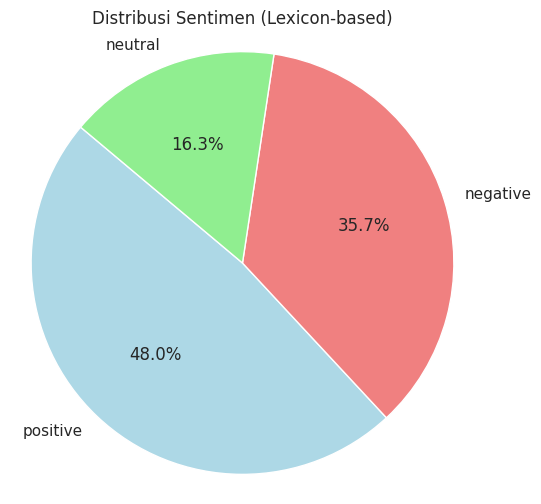

In [ ]:
# Hitung jumlah masing-masing sentimen
polarity_counts = data_model['polarity'].value_counts()

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    polarity_counts,
    labels=polarity_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['lightblue',  'lightcoral', 'lightgreen']
)
plt.title('Distribusi Sentimen (Lexicon-based)')
plt.axis('equal')  # Membuat pie menjadi lingkaran sempurna
plt.show()

### B.4.2 Distribusi Sentimen per Rating

sentiment,-1,0,1
score,,,
1,2149,365,652
2,521,102,227
3,585,155,370
4,564,207,644
5,2439,2024,6529


<Figure size 1000x600 with 0 Axes>

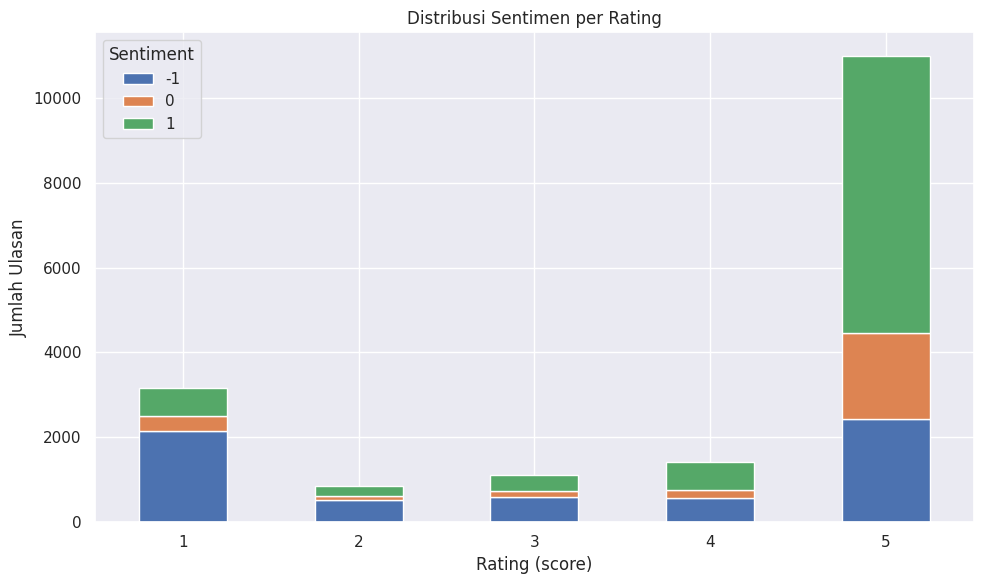

In [ ]:
# 1. Hitung jumlah sentimen per score
sentiment_by_score = data_model.groupby(['score', 'sentiment']) \
                               .size() \
                               .unstack(fill_value=0)

# 2. Tampilkan tabel ringkas
display(sentiment_by_score)

# 3. Plot stacked bar chart
plt.figure(figsize=(10,6))
sentiment_by_score.plot(kind='bar',
                        stacked=True,
                        figsize=(10,6))

plt.title('Distribusi Sentimen per Rating')
plt.xlabel('Rating (score)')
plt.ylabel('Jumlah Ulasan')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

### B.4.3 Wordcloud and distribusi word Positive

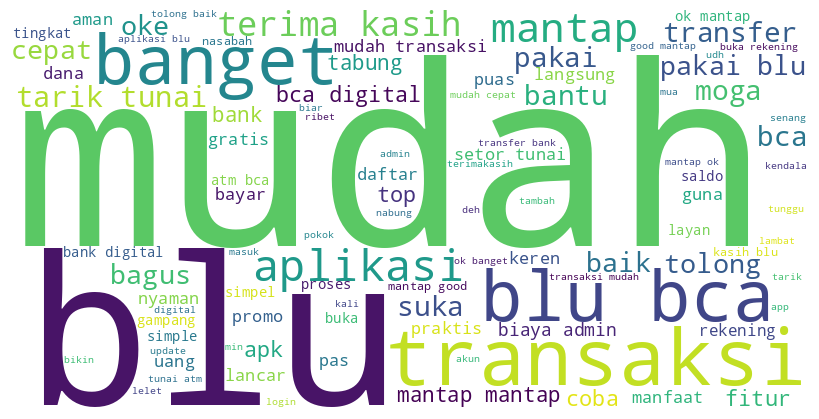

In [ ]:
# Gabungkan semua teks dengan polaritas positif menjadi satu string
teks_positif = " ".join(data_fix[data_fix['sentiment'] == 1]['text_akhir'])

# Membuat objek WordCloud dari teks positif tanpa rotasi (semua horizontal)
wordcloud_positif = WordCloud(
    width=800,
    height=400,
    background_color='white',
    min_font_size=10,
    prefer_horizontal=1.0  # Semua kata horizontal
).generate(teks_positif)

# Menampilkan gambar WordCloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_positif)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

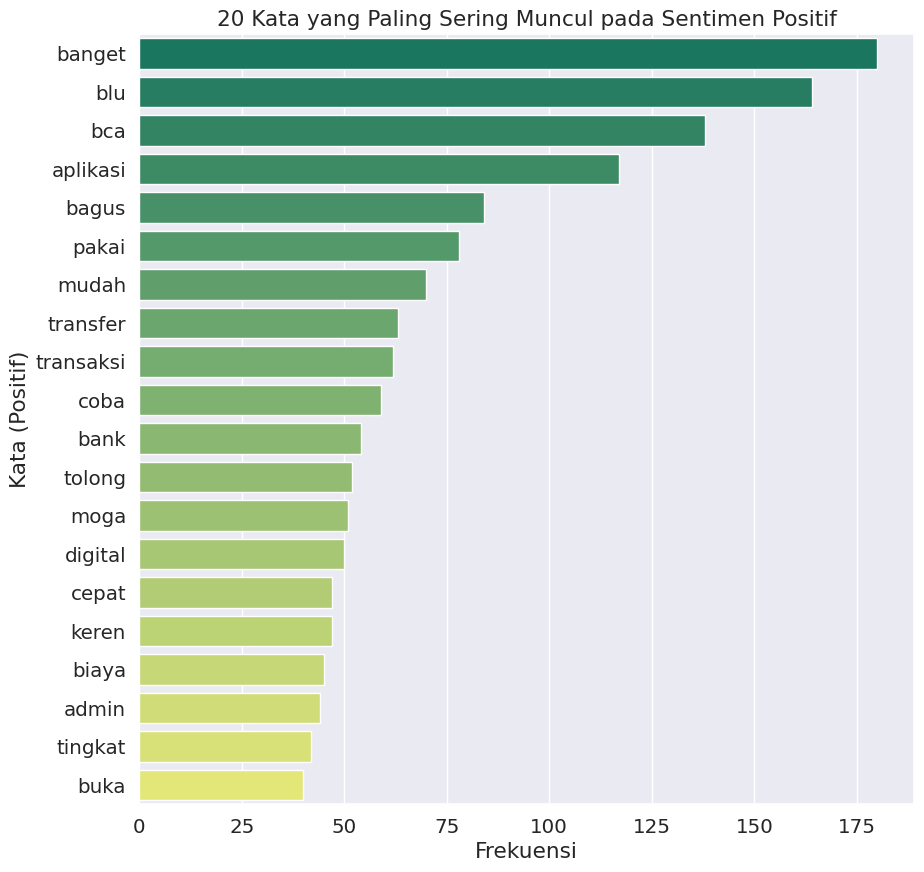

In [ ]:
# Setelan visualisasi dan nonaktifkan warning
sns.set()
warnings.filterwarnings('ignore')

# Kumpulkan semua kata dari teks yang memiliki sentimen positif
semua_kata = []
for kalimat in data_fix[data_fix['polarity_score'] == 1]['text_akhir'].to_list(): # Replace 'sentiment' with 'polarity_score' and  data_fix['sentiment'] == 1 with data_fix['polarity_score'] > 0
    for kata in kalimat.split():
        semua_kata.append(kata)

# Hitung 25 kata yang paling sering muncul
df1 = pd.DataFrame(Counter(semua_kata).most_common(20), columns=['Kata', 'Frekuensi'])

# Atur tampilan plot
sns.set_context('notebook', font_scale=1.3)
plt.figure(figsize=(10, 10))

# Buat diagram batang horizontal menggunakan seaborn
sns.barplot(y=df1['Kata'], x=df1['Frekuensi'], palette='summer')

# Tambahkan judul dan label sumbu
plt.title("20 Kata yang Paling Sering Muncul pada Sentimen Positif")
plt.xlabel("Frekuensi")
plt.ylabel("Kata (Positif)")
plt.show()

**Insight: **

- Kata yang paling sering muncul merupakan kata penyusun dari nama aplikasinya, yaitu ruang guru
- Dari 10 kata yang paling sering muncul juga terdapat beberapa kata yang menunjukkan bahwa pengguna sangat terbantu dengan adanya aplikasi ruang guru. Hal ini ditandai dengan adanya kata terima, kasih, mudah, banget, dan paham

### B.4.4 Wordcloud and distribusi word negative

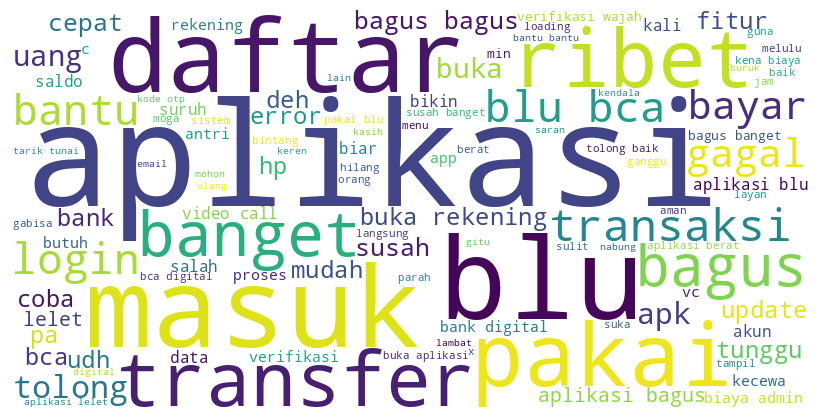

In [ ]:
# Gabungkan semua teks dengan polaritas negatif menjadi satu string
teks_negatif = " ".join(data_fix[data_fix['sentiment'] == -1]['text_akhir'])

# Membuat objek WordCloud dari teks negatif tanpa rotasi (semua horizontal)
wordcloud_negatif = WordCloud(
    width=800,
    height=400,
    background_color='white',
    min_font_size=10,
    prefer_horizontal=1.0  # Semua kata horizontal
).generate(teks_negatif)

# Menampilkan gambar WordCloud untuk sentimen negatif
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_negatif)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


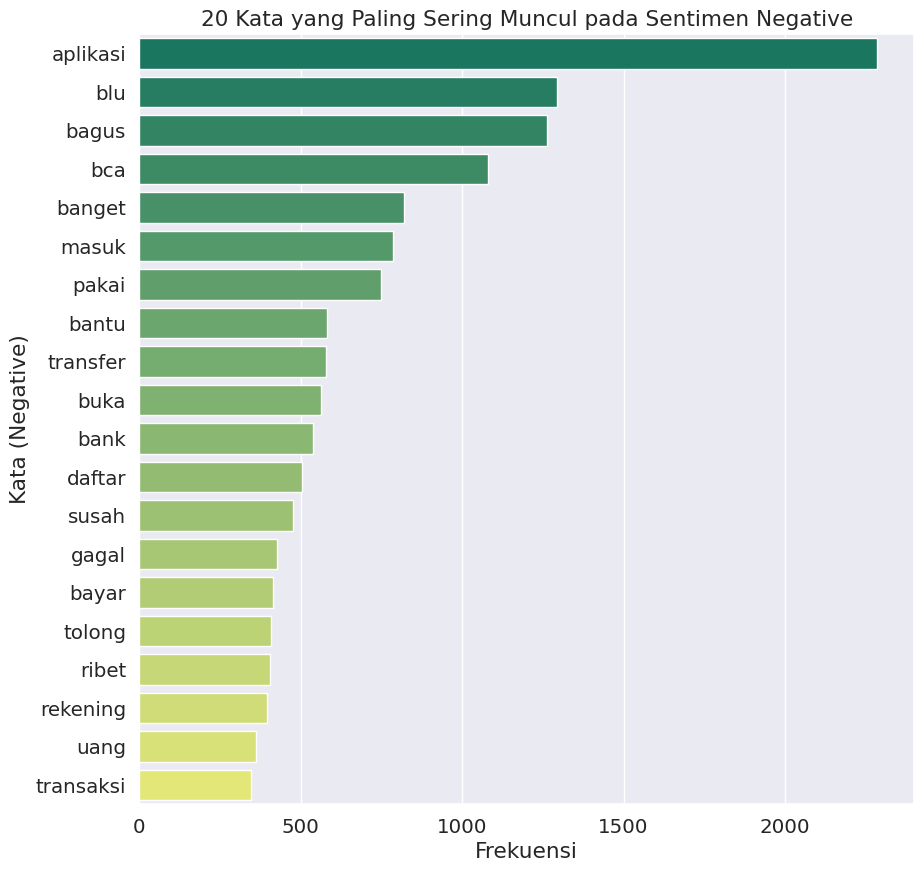

In [ ]:
# Setelan visualisasi dan nonaktifkan warning
sns.set()
warnings.filterwarnings('ignore')

# Kumpulkan semua kata dari teks yang memiliki sentimen positif
semua_kata = []
for kalimat in data_fix[data_fix['sentiment'] == -1]['text_akhir'].to_list(): # Replace 'sentiment' with 'polarity_score' and  data_fix['sentiment'] == 1 with data_fix['polarity_score'] > 0
    for kata in kalimat.split():
        semua_kata.append(kata)

# Hitung 25 kata yang paling sering muncul
df1 = pd.DataFrame(Counter(semua_kata).most_common(20), columns=['Kata', 'Frekuensi'])

# Atur tampilan plot
sns.set_context('notebook', font_scale=1.3)
plt.figure(figsize=(10, 10))

# Buat diagram batang horizontal menggunakan seaborn
sns.barplot(y=df1['Kata'], x=df1['Frekuensi'], palette='summer')

# Tambahkan judul dan label sumbu
plt.title("20 Kata yang Paling Sering Muncul pada Sentimen Negative")
plt.xlabel("Frekuensi")
plt.ylabel("Kata (Negative)")
plt.show()

**Insight:**
- Kata ajar, ruang, guru, dan aplikasi mendominasi pada ulasan negative


### B.4.5 Wordcloud and distribusi word Neutral

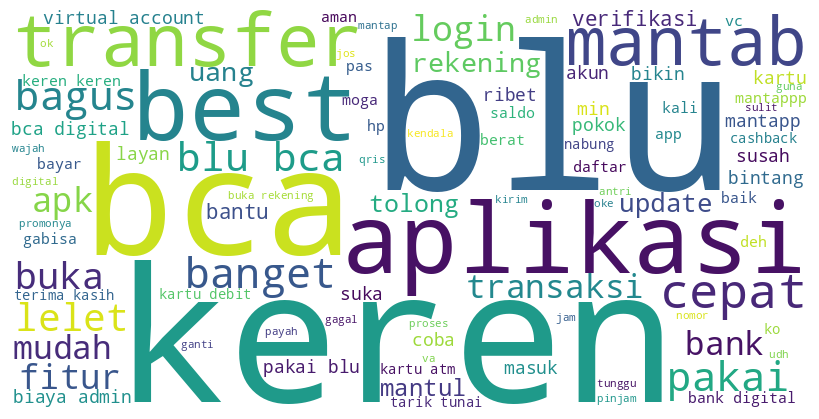

In [ ]:
# Gabungkan semua teks dengan polaritas negatif menjadi satu string
teks_netral = " ".join(data_fix[data_fix['sentiment'] == 0]['text_akhir'])

# Membuat objek WordCloud dari teks negatif tanpa rotasi (semua horizontal)
wordcloud_netral = WordCloud(
    width=800,
    height=400,
    background_color='white',
    min_font_size=10,
    prefer_horizontal=1.0  # Semua kata horizontal
).generate(teks_netral)

# Menampilkan gambar WordCloud untuk sentimen negatif
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_netral)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


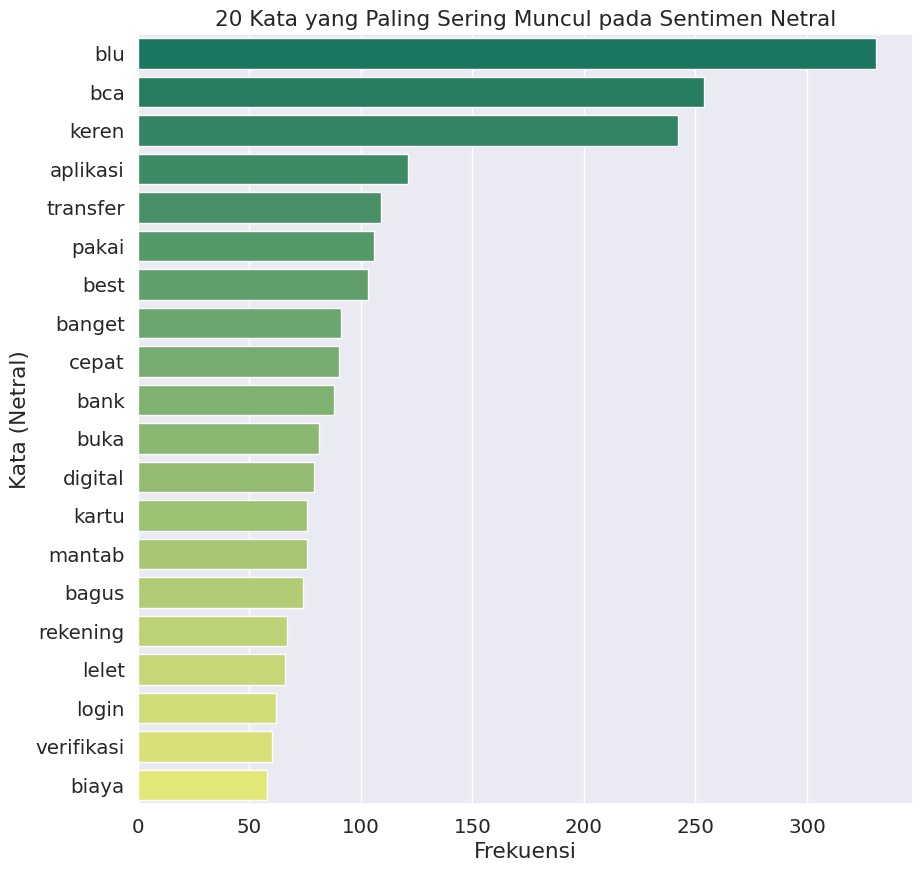

In [ ]:
# Setelan visualisasi dan nonaktifkan warning
sns.set()
warnings.filterwarnings('ignore')

# Kumpulkan semua kata dari teks yang memiliki sentimen positif
semua_kata = []
for kalimat in data_fix[data_fix['sentiment'] == 0]['text_akhir'].to_list(): # Replace 'sentiment' with 'polarity_score' and  data_fix['sentiment'] == 1 with data_fix['polarity_score'] > 0
    for kata in kalimat.split():
        semua_kata.append(kata)

# Hitung 25 kata yang paling sering muncul
df1 = pd.DataFrame(Counter(semua_kata).most_common(20), columns=['Kata', 'Frekuensi'])

# Atur tampilan plot
sns.set_context('notebook', font_scale=1.3)
plt.figure(figsize=(10, 10))

# Buat diagram batang horizontal menggunakan seaborn
sns.barplot(y=df1['Kata'], x=df1['Frekuensi'], palette='summer')

# Tambahkan judul dan label sumbu
plt.title("20 Kata yang Paling Sering Muncul pada Sentimen Netral")
plt.xlabel("Frekuensi")
plt.ylabel("Kata (Netral)")
plt.show()

**Insight:**
- Kata ajar, ruang, guru, dan aplikasi mendominasi pada ulasan netral

### B.4.4 Wordcloud and distribusi word positive, neutral, and negative

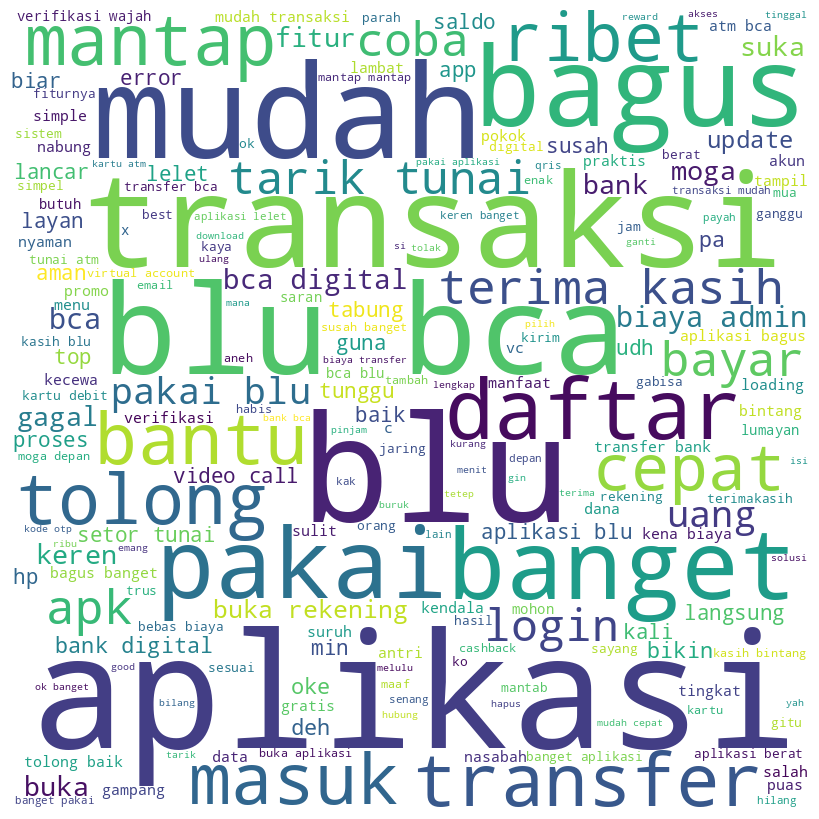

In [ ]:
# Gabungkan semua teks dengan polaritas general menjadi satu string
teks_general = " ".join(data_fix['text_akhir'])

# Membuat objek WordCloud dari teks negatif tanpa rotasi (semua horizontal)
wordcloud_general = WordCloud(
    width=800,
    height=800,
    background_color='white',
    min_font_size=10,
    prefer_horizontal=1.0  # Semua kata horizontal
).generate(teks_general)

# Menampilkan gambar WordCloud untuk sentimen negatif
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_general)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


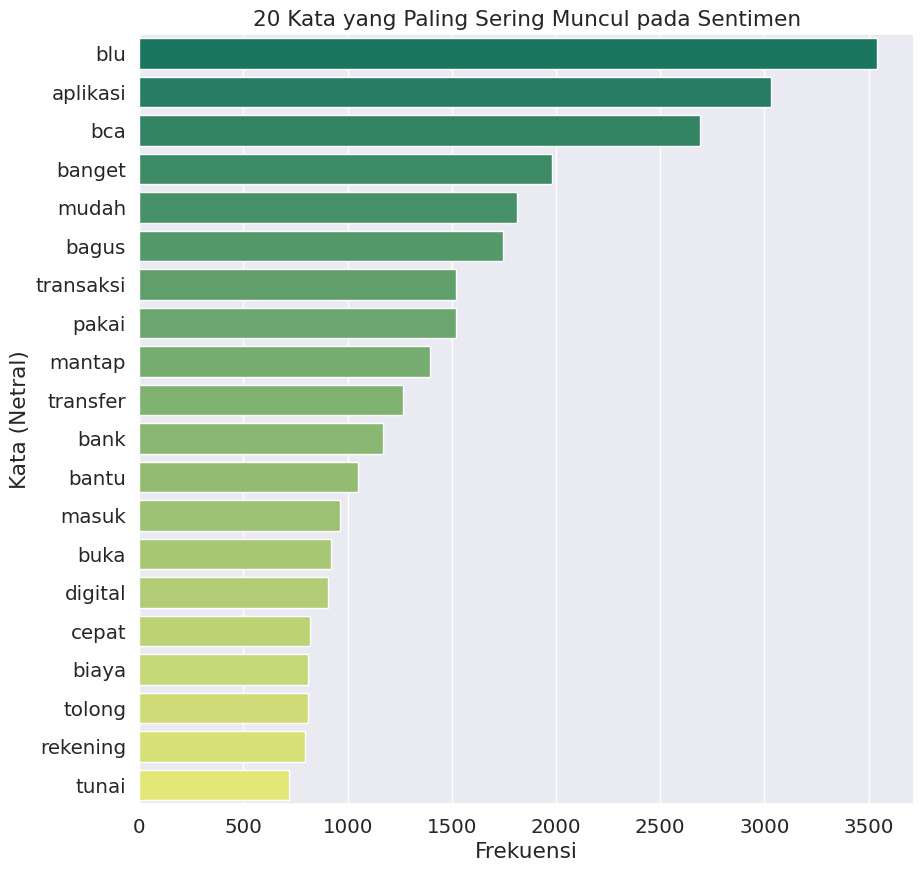

In [ ]:
# Setelan visualisasi dan nonaktifkan warning
sns.set()
warnings.filterwarnings('ignore')

# Kumpulkan semua kata dari teks yang memiliki sentimen positif
semua_kata = []
for kalimat in data_fix['text_akhir'].to_list(): # Replace 'sentiment' with 'polarity_score' and  data_fix['sentiment'] == 1 with data_fix['polarity_score'] > 0
    for kata in kalimat.split():
        semua_kata.append(kata)

# Hitung 25 kata yang paling sering muncul
df1 = pd.DataFrame(Counter(semua_kata).most_common(20), columns=['Kata', 'Frekuensi'])

# Atur tampilan plot
sns.set_context('notebook', font_scale=1.3)
plt.figure(figsize=(10, 10))

# Buat diagram batang horizontal menggunakan seaborn
sns.barplot(y=df1['Kata'], x=df1['Frekuensi'], palette='summer')

# Tambahkan judul dan label sumbu
plt.title("20 Kata yang Paling Sering Muncul pada Sentimen")
plt.xlabel("Frekuensi")
plt.ylabel("Kata (Netral)")
plt.show()

**Insight:**
- Kata ajar, ruang, guru, aplikasi, dan ruangguru mendominasi pada ulasan

Untuk memudahkan eksekusi tanpa harus melakukan stemming beruang kali, saya menyimpan data hasil stemming ke dalam csv. Setelah berhasil download file, program di bawah akan saya jadikan komentar dan langsung runing ke bagian pemodelan.

In [ ]:
# Menyimpan data_fix to csv
data_fix.to_csv('ulasan_sentimen.csv', index=False)
FileLink('ulasan_sentimen.csv')

/content/ulasan_sentimen.csv

# C. Pemodelan

In [ ]:
#load data ulasan_sentimen
file_id = '1y1lBS91ZpZnZecgz7IJJRH1knTZWqCan'
download_url = f'https://drive.google.com/uc?id={file_id}'

# Baca file CSV dari URL
data_fix = pd.read_csv(download_url)

# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
data_fix

,stemmed,text_akhir,polarity_score,polarity,sentiment
0,"['suka', 'transaksi', 'pakai', 'aplikasi', 'bl...",suka transaksi pakai aplikasi blu bca kurang f...,-4,negative,-1
1,"['tolong', 'baik', 'tolong', 'user', 'aplikasi...",tolong baik tolong user aplikasi blu detik apl...,-10,negative,-1
2,"['daftar', 'kemarin', 'kayak', 'ubah', 'berat'...",daftar kemarin kayak ubah berat lelet alias la...,-14,negative,-1
3,"['kali', 'bayar', 'transfer', 'aplikasi', 'buk...",kali bayar transfer aplikasi buka stack halama...,-22,negative,-1
4,"['fitur', 'mantap', 'mudah', 'kurang', 'aplika...",fitur mantap mudah kurang aplikasi lelet bange...,13,positive,1
...,...,...,...,...,...
17528,['nice'],nice,4,positive,1
17529,['oke'],oke,2,positive,1
17530,['ok'],ok,4,positive,1
17531,['good'],good,5,positive,1


In [ ]:
# Pengaturan tampilan
sns.set()
warnings.filterwarnings('ignore')

In [ ]:
# membuat dataframe untuk menyimpan hasil evaluasi
stem_model_eval_tts_train = pd.DataFrame(columns=['Accuracy'])
stem_model_eval_tts_test = pd.DataFrame(columns=['Accuracy'])

## C.1 Ekstrasi Fitur Tfidf dan Handling Imbalanced data

In [ ]:
import joblib

# 1. Pastikan tidak ada nilai NaN di fitur teks dan label
data_fix = data_fix.dropna(subset=['text_akhir', 'polarity'])

# 2. Pisahkan fitur dan label
X = data_fix['text_akhir']
y = data_fix['polarity']

# 3. Inisialisasi dan fit TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

# 4. Simpan TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.joblib')

# 5. Konversi hasil ekstraksi fitur menjadi DataFrame (opsional, hanya untuk eksplorasi)
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# 6. Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 7. Tampilkan hasil ekstraksi fitur
features_df.head()

,account,admin,akses,aktif,akun,aman,ambil,aneh,antri,apa,...,uang,udh,ulang,update,va,vc,verifikasi,video,virtual,wajah
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.267126,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.293551,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.222082,0.0,0.0,0.251753,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Menyimpan data_fix to csv
features_df.to_csv('data_tfidf.csv', index=False)
FileLink('data_tfidf.csv')

/content/data_tfidf.csv

In [ ]:
# Terapkan SMOTE hanya ke data latih
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

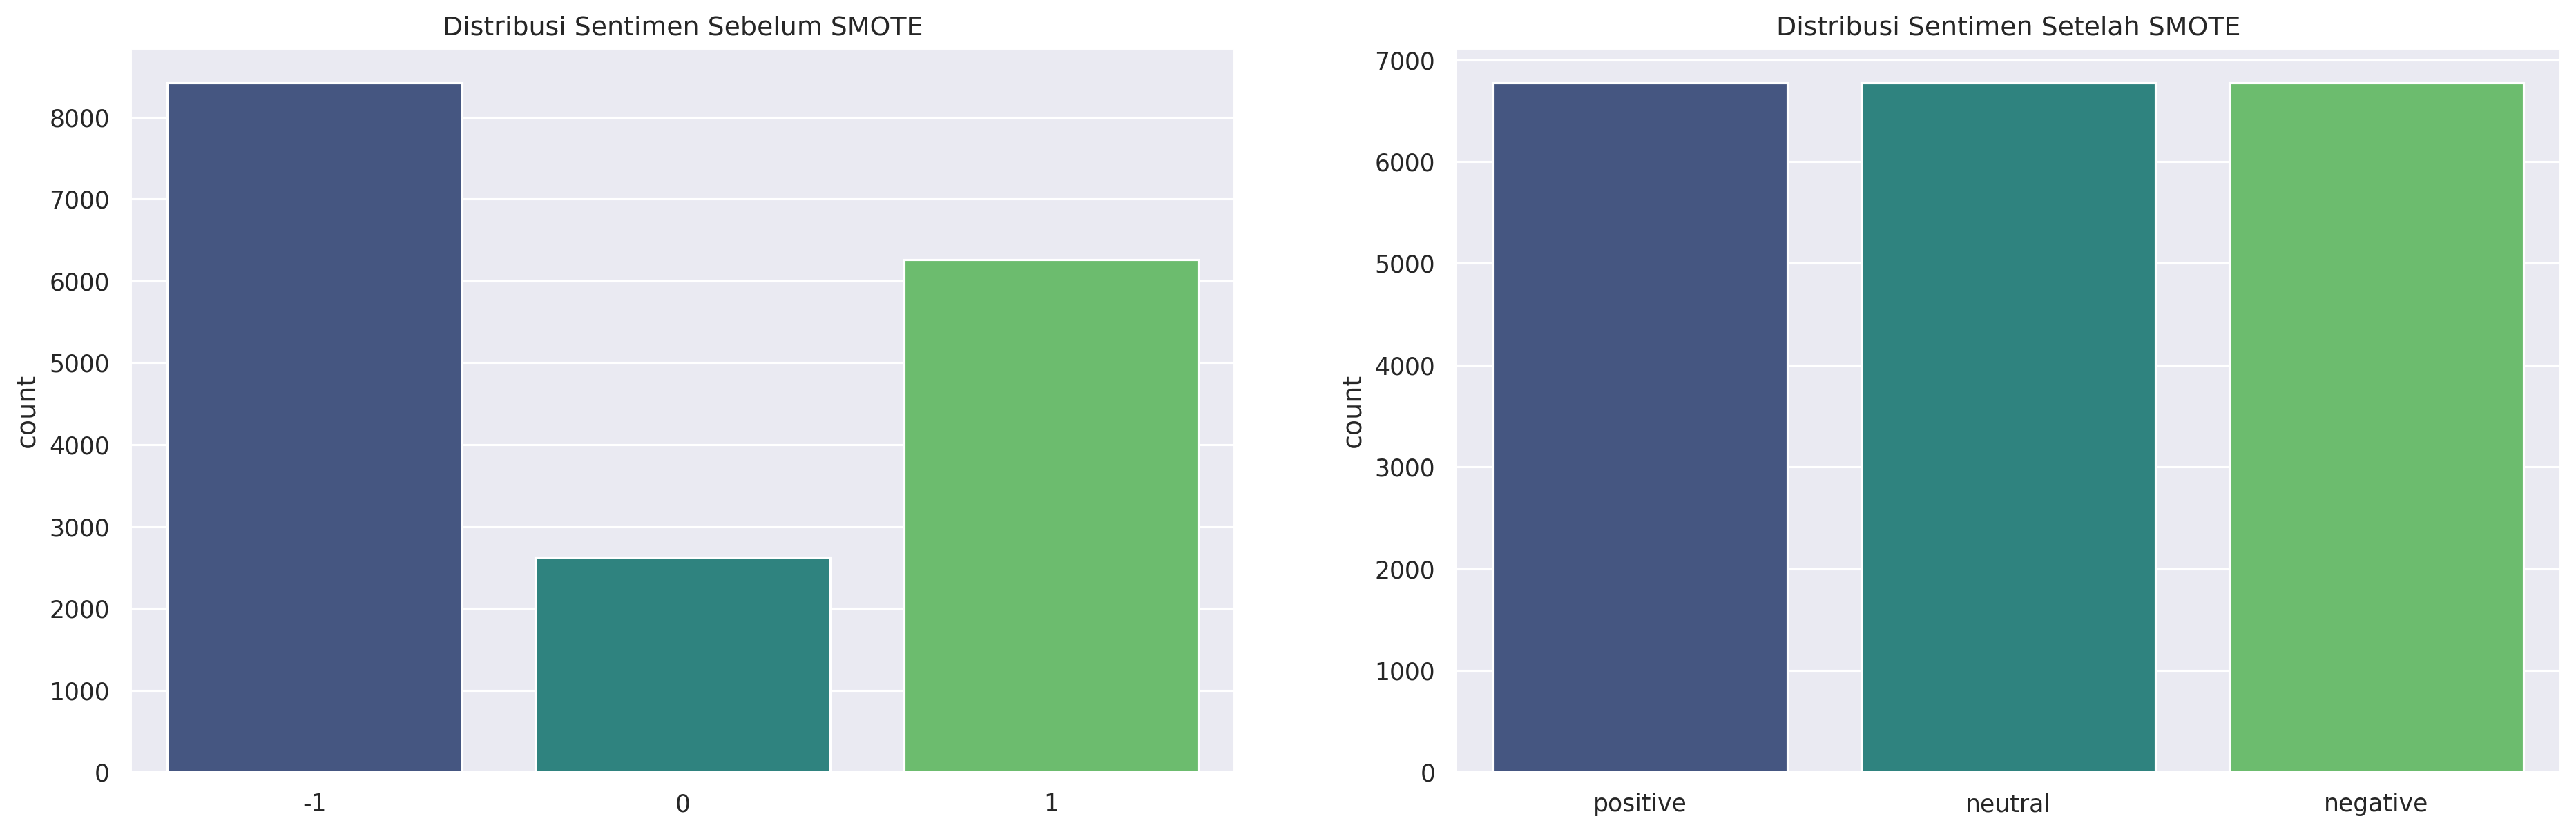

In [ ]:
# Menentukan warna dan ukuran untuk visualisasi (jika digunakan)
sizes = [747, 4825]

# Membuat visualisasi distribusi data secara berdampingan
plt.figure(figsize=(20, 6), dpi=227)

# Plot distribusi data sebelum diterapkan SMOTE
plt.subplot(1, 2, 1)
plt.title("Distribusi Sentimen Sebelum SMOTE")
sns.barplot(
    x=data_fix['sentiment'].unique(),
    y=data_fix['sentiment'].value_counts(),
    palette='viridis'
)

# Plot distribusi data setelah diterapkan SMOTE
plt.subplot(1, 2, 2)
plt.title("Distribusi Sentimen Setelah SMOTE")
sns.barplot(
    x=y_train_sm.unique(),
    y=y_train_sm.value_counts(),
    palette='viridis'
)

# Tampilkan hasil visualisasi
plt.show()

**Insight:**
- Pada diagram kiri, data awal menunjukan bahwa terjadi imbalanced data. Dapat dilihat, pada label 0 (netral) merupakan kelas minoritas, sehingga memerlukan penanganan dengan smote.
- SMOTE adalah singkatan dari Synthetic Minority Over-sampling Technique. Ini adalah teknik resampling data yang digunakan untuk mengatasi masalah ketidakseimbangan kelas (imbalanced dataset), khususnya ketika jumlah data pada kelas minoritas jauh lebih sedikit daripada kelas mayoritas.

## C.2 Algoritma 1 (Machine Learning) : SVM

### C.2.1 algoritma 1 dengan train 80%

In [ ]:
#We separate our data is train and test
X_train, X_test, Y_train, Y_test = train_test_split(
    X_train_sm,y_train_sm, test_size = 0.2, random_state = 1)

In [ ]:
# Membuat model Support Vector Classifier (SVC) dengan kernel radial basis function (rbf) dan nilai parameter C yang sudah ditentukan
svc_80 = SVC(C=3.08402743675275, kernel='rbf')

# Melatih model SVC menggunakan data latih
svc_80.fit(X_train.toarray(), Y_train)

# Menggunakan model yang sudah dilatih untuk memprediksi label pada data uji
Y_pred_svc = svc_80.predict(X_test.toarray())

# Menggunakan model yang sama untuk memprediksi label pada data latih
Y_pred_tr_svc = svc_80.predict(X_train.toarray())

In [ ]:
# Menghitung akurasi model pada data latih, lalu membulatkannya ke satu angka desimal
accuracy_train_svc = round(accuracy_score(Y_train, Y_pred_tr_svc) * 100, 1)

# Menghitung akurasi model pada data uji, lalu membulatkannya ke satu angka desimal
accuracy_test_svc = round(accuracy_score(Y_test, Y_pred_svc) * 100, 1)

print("hasil akurasi Train SVM: ", round(accuracy_train_svc,1)," %")
print("hasil akurasi Test SVM: ", round(accuracy_test_svc,1),"%")

hasil akurasi Train SVM:  96.7  %
hasil akurasi Test SVM:  90.8 %


In [ ]:
# Buat DataFrame kosong untuk menyimpan evaluasi model
stem_model_eval_tts_train = pd.DataFrame(columns=['Accuracy'])
stem_model_eval_tts_test = pd.DataFrame(columns=['Accuracy'])

In [ ]:
#Save Evaluation
stem_model_eval_tts_train.loc['SVM Train 80%'] = [accuracy_train_svc]
stem_model_eval_tts_test.loc['SVM Test 20%'] = [accuracy_test_svc]

### C.2.2 algoritma 1 dengan train 70%

In [ ]:
#We separate our data is train and test
X_train, X_test, Y_train, Y_test = train_test_split(
    X_train_sm,y_train_sm, test_size = 0.3, random_state = 2)

In [ ]:
# Membuat model Support Vector Classifier (SVC) dengan kernel radial basis function (rbf) dan nilai parameter C yang sudah ditentukan
svc = SVC(C=3.811381411635508, kernel='rbf')

# Melatih model SVC menggunakan data latih
svc.fit(X_train.toarray(), Y_train)

# Menggunakan model yang sudah dilatih untuk memprediksi label pada data uji
Y_pred_svc = svc.predict(X_test.toarray())

# Menggunakan model yang sama untuk memprediksi label pada data latih
Y_pred_tr_svc = svc.predict(X_train.toarray())

In [ ]:
# Menghitung akurasi model pada data latih, lalu membulatkannya ke satu angka desimal
accuracy_train_svc_30 = round(accuracy_score(Y_train, Y_pred_tr_svc) * 100, 1)

# Menghitung akurasi model pada data uji, lalu membulatkannya ke satu angka desimal
accuracy_test_svc_30 = round(accuracy_score(Y_test, Y_pred_svc) * 100, 1)

print("hasil akurasi Train SVM: ", round(accuracy_train_svc,1)," %")
print("hasil akurasi Test SVM: ", round(accuracy_test_svc,1),"%")

hasil akurasi Train SVM:  96.7  %
hasil akurasi Test SVM:  90.8 %


In [ ]:
#Save Evaluation
stem_model_eval_tts_train.loc['SVM Train 70%'] = [accuracy_train_svc_30]
stem_model_eval_tts_test.loc['SVM Test 30%'] = [accuracy_test_svc_30]

**Insight:**
- SVM adalah
- Setelah menggunakan dua skema split data, dapat disimpulkan bahwa:
  1. Pada data train 80% dan data test 20%, nilai hasil akurasi Train SVM adalah 98.9% dan hasil akurasi Test SVM adalah 88.9%
  2. Pada data train 70% dan data test 30%, nilai hasil akurasi Train SVM adalah 98.9% dan hasil akurasi Test SVM adalah 88.7%

## C.3  Algoritma 2 (Machine Learning) : Naive Bayes

### C.3.1 algoritma 2 dengan train 80%

In [ ]:
# We separate our data is train and test
X_train, X_test, Y_train, Y_test = train_test_split(
    X_train_sm,y_train_sm, test_size = 0.2, random_state = 1)

#### C.3.1.1 Sebelum Tuning

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Encode label
label_encoder = LabelEncoder()
label_encoder.fit(Y_train)

Y_train_encoded = label_encoder.transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

# Convert X_train and X_test to dense NumPy arrays
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Training model dengan label yang sudah di-encode
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_dense, Y_train_encoded) # Use X_train_dense here

# Prediksi
y_pred_train = naive_bayes.predict(X_train_dense) # Use X_train_dense here
y_pred_test = naive_bayes.predict(X_test_dense) # Use X_test_dense here

# Evaluasi dengan label yang juga sudah di-encode
acc_train_nb = round(accuracy_score(Y_train_encoded, y_pred_train) * 100,1)
acc_test_nb = round(accuracy_score(Y_test_encoded, y_pred_test) * 100,1)

print(f"hasil akurasi train 80% Naive Bayes: {acc_train_nb}%")
print(f"hasil akurasi test 20% Naive Bayes: {acc_test_nb}%")

hasil akurasi train 80% Naive Bayes: 74.1%
hasil akurasi test 20% Naive Bayes: 72.1%


In [ ]:
#Save Evaluation
stem_model_eval_tts_train.loc['Naive Bayes Train 80% (Before tunning)'] = [acc_train_nb]
stem_model_eval_tts_test.loc['Naive Bayes Test 20% (Before tunning)'] = [acc_test_nb]

#### C.3.1.2 Setelah Tuning

In [ ]:
import optuna
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

def objective(trial):
    # Define hyperparameters to tune
    params = {
        'var_smoothing': trial.suggest_loguniform('var_smoothing', 1e-9, 1e-1)
    }

    # Create the Naive Bayes classifier with the suggested hyperparameters
    naive_bayes = GaussianNB(**params)

    # Train the classifier and evaluate on the validation set
    # Convert X_train and X_test to dense arrays
    naive_bayes.fit(X_train.toarray(), Y_train) # Change is here
    y_pred = naive_bayes.predict(X_test.toarray()) # Change is here

    accuracy = accuracy_score(Y_test, y_pred)
    return accuracy

# Run the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500, timeout=30*60)

# Print the best hyperparameters and the corresponding accuracy
best_params = study.best_params
best_accuracy = study.best_value
print('Best Hyperparameters:', best_params)
print('Best Accuracy:', best_accuracy)

[I 2025-05-06 12:43:05,235] A new study created in memory with name: no-name-1e0cc5ab-b18d-44cb-8258-2f747ef398f9
[I 2025-05-06 12:43:05,465] Trial 0 finished with value: 0.7230693556320709 and parameters: {'var_smoothing': 0.00026430816238715493}. Best is trial 0 with value: 0.7230693556320709.
[I 2025-05-06 12:43:05,633] Trial 1 finished with value: 0.7262666010821446 and parameters: {'var_smoothing': 0.0009397863528907433}. Best is trial 1 with value: 0.7262666010821446.
[I 2025-05-06 12:43:05,822] Trial 2 finished with value: 0.7208558780127889 and parameters: {'var_smoothing': 1.3671001971540516e-09}. Best is trial 1 with value: 0.7262666010821446.
[I 2025-05-06 12:43:05,977] Trial 3 finished with value: 0.7208558780127889 and parameters: {'var_smoothing': 1.673400213216044e-08}. Best is trial 1 with value: 0.7262666010821446.
[I 2025-05-06 12:43:06,137] Trial 4 finished with value: 0.720609936055091 and parameters: {'var_smoothing': 2.884935659695358e-08}. Best is trial 1 with va

Best Hyperparameters: {'var_smoothing': 0.033951994584660965}
Best Accuracy: 0.7710280373831776


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Encode label
label_encoder = LabelEncoder()
label_encoder.fit(Y_train)

Y_train_encoded = label_encoder.transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

# Convert X_train and X_test to dense NumPy arrays
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Hyperparameter terbaik dari Optuna
best_var_smoothing = 0.021228617071559812

# Training model dengan label yang sudah di-encode dan var_smoothing yang telah di-tune
naive_bayes_80 = GaussianNB(var_smoothing=best_var_smoothing)
naive_bayes_80.fit(X_train_dense, Y_train_encoded)  # Use X_train_dense here

# Prediksi
y_pred_train_tuning = naive_bayes_80.predict(X_train_dense)  # Use X_train_dense here
y_pred_test_tuning = naive_bayes_80.predict(X_test_dense)  # Use X_test_dense here

# Evaluasi dengan label yang juga sudah di-encode
acc_train_nb_tuning = round(accuracy_score(Y_train_encoded, y_pred_train_tuning) * 100,1)
acc_test_nb_tuning = round(accuracy_score(Y_test_encoded, y_pred_test_tuning) * 100,1)

print(f"hasil akurasi train 80% Naive Bayes setelah tuning: {acc_train_nb_tuning}%")
print(f"hasil akurasi test 20% Naive Bayes setelah tuning: {acc_test_nb_tuning}%")

hasil akurasi train 80% Naive Bayes setelah tuning: 77.1%
hasil akurasi test 20% Naive Bayes setelah tuning: 74.5%


In [ ]:
#Save Evaluation
stem_model_eval_tts_train.loc['Naive Bayes Train 80% (After tunning)'] = [acc_train_nb_tuning]
stem_model_eval_tts_test.loc['Naive Bayes Test 20% (After tunning)'] = [acc_test_nb_tuning]

**Insight:**
- Setelah dilakukan tuning dengan optuna, dan menerapkan best parammeter nya, tetapi nilai akurasinya masih di bawah 85%

### C.3.2  algoritma 2 dengan train 70%

In [ ]:
#We separate our data is train and test
X_train, X_test, Y_train, Y_test = train_test_split(
    X_train_sm,y_train_sm, test_size = 0.3, random_state = 2)

#### C.3.1.1 Sebelum Tuning

In [ ]:
# Encode label
label_encoder = LabelEncoder()
label_encoder.fit(Y_train)

Y_train_encoded = label_encoder.transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

# Convert X_train and X_test to dense NumPy arrays
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Training model dengan label yang sudah di-encode
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_dense, Y_train_encoded) # Use X_train_dense here

# Prediksi
y_pred_train = naive_bayes.predict(X_train_dense) # Use X_train_dense here
y_pred_test = naive_bayes.predict(X_test_dense) # Use X_test_dense here

# Evaluasi dengan label yang juga sudah di-encode
acc_train_nb_70 = round(accuracy_score(Y_train_encoded, y_pred_train) * 100,1)
acc_test_nb_30 = round(accuracy_score(Y_test_encoded, y_pred_test) * 100,1)

print(f"hasil akurasi train 80% Naive Bayes: {acc_train_nb_70}%")
print(f"hasil akurasi test 20% Naive Bayes  : {acc_test_nb_30}%")

hasil akurasi train 80% Naive Bayes: 73.9%
hasil akurasi test 20% Naive Bayes  : 73.9%


In [ ]:
#Save Evaluation
stem_model_eval_tts_train.loc['Naive Bayes Train 70% (Before tunning)'] = [acc_train_nb_70]
stem_model_eval_tts_test.loc['Naive Bayes Test 30% (Before tunning)'] = [acc_test_nb_30]

#### C.3.1.2 Sesudah Tuning

In [ ]:
# Encode label
label_encoder = LabelEncoder()
label_encoder.fit(Y_train)

Y_train_encoded = label_encoder.transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

# Convert X_train and X_test to dense NumPy arrays
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Hyperparameter terbaik dari Optuna
best_var_smoothing = 0.021228617071559812

# Training model dengan label yang sudah di-encode dan var_smoothing yang telah di-tune
naive_bayes = GaussianNB(var_smoothing=best_var_smoothing)
naive_bayes.fit(X_train_dense, Y_train_encoded)  # Use X_train_dense here

# Prediksi
y_pred_train_tuning = naive_bayes.predict(X_train_dense)  # Use X_train_dense here
y_pred_test_tuning = naive_bayes.predict(X_test_dense)  # Use X_test_dense here

# Evaluasi dengan label yang juga sudah di-encode
acc_train_nb_tuning_70 = round(accuracy_score(Y_train_encoded, y_pred_train_tuning) * 100,1)
acc_test_nb_tuning_30 = round(accuracy_score(Y_test_encoded, y_pred_test_tuning) * 100,1)

print(f"hasil akurasi train 80% Naive Bayes setelah tuning: {acc_train_nb_tuning_70}%")
print(f"hasil akurasi test 205 Naive Bayes setelah tuning: {acc_test_nb_tuning_30}%")

hasil akurasi train 80% Naive Bayes setelah tuning: 76.9%
hasil akurasi test 205 Naive Bayes setelah tuning: 76.8%


In [ ]:
#Save Evaluation
stem_model_eval_tts_train.loc['Naive Bayes Train 70% (After tunning)'] = [acc_train_nb_tuning_70]
stem_model_eval_tts_test.loc['Naive Bayes Test 30% (After tunning)'] = [acc_test_nb_tuning_30]

# D. Evaluasi Model

## D.1 Test Acuracy

In [ ]:
stem_model_eval_tts_test

,Accuracy
SVM Test 20%,90.8
SVM Test 30%,90.6
Naive Bayes Test 20% (Before tunning),72.1
Naive Bayes Test 20% (After tunning),74.5
Naive Bayes Test 30% (Before tunning),73.9
Naive Bayes Test 30% (After tunning),76.8


## D.2 Train Accuracy

In [ ]:
stem_model_eval_tts_train

,Accuracy
SVM Train 80%,96.7
SVM Train 70%,96.6
Naive Bayes Train 80% (Before tunning),74.1
Naive Bayes Train 80% (After tunning),77.1
Naive Bayes Train 70% (Before tunning),73.9
Naive Bayes Train 70% (After tunning),76.9


**Insight:**
- Algoritma SVM memiliki nilai accuracy yang tinggi (>85%) di semua skema pembagian data, bahkan tanpa tunning.
- Algortima Naive Bayes memiliki nilai accuracy yang sangat rendah, sebelum tunning nilai accuracy nya di bawah 74%. Namun, ketika dilakukan hyper tunning dengan optuna, nilai acurracy nya masih jauh dari angka 85%.
- Berdasarkan hasil perbandingan nilai akurasi dari seluruh model, algoritma SVM dengan pembagian data train 70% dan data test 30% merupakan algoritma yang bisa dikatakan optimal, karena nilai accuracy nya merupakan yang tertinggi di antara yang lain.

# E. Inference

In [ ]:
print(svc.classes_)

['negative' 'neutral' 'positive']


In [ ]:
def proses_teks_input(text):
    # 1. Preprocessing
    teks = cleaningText(text)
    teks = normalisasi_slang(teks)
    teks = ' '.join(tokenizingText(teks))

    # 2. TF-IDF → toarray() (karena svc dilatih di dense)
    v = tfidf.transform([teks]).toarray()

    # 3. Prediksi (mengembalikan 'negative' / 'neutral' / 'positive')
    pred = svc_80.predict(v)[0]

    # 4. Kembalikan hasilnya
    return f"kalimat terdeteksi {pred}"

In [ ]:
def interactive_predict():
    print("Ketik 'exit' untuk keluar.")
    while True:
        kalimat = input("Masukkan kalimat baru: ").strip()
        if kalimat.lower() in ('exit', 'quit', ''):
            print("Selesai.")
            break
        print(proses_teks_input(kalimat))

interactive_predict()

Ketik 'exit' untuk keluar.
Masukkan kalimat baru: aplikasinya bagus banget, tapi sering error dan lag
kalimat terdeteksi negative
Masukkan kalimat baru: exit
Selesai.


# F. Saving Model

In [ ]:
from joblib import dump

dump(svc_80,"model.joblib")

['model.joblib']

In [ ]:
from joblib import load

model = load("model.joblib")
model

SVC(C=3.08402743675275)

In [ ]:
from joblib import load

tfidf_model = load("tfidf_vectorizer.joblib")
tfidf_model

TfidfVectorizer(max_df=0.8, max_features=200, min_df=17)

In [ ]:
def proses_teks_input(text):
    # 1. Preprocessing
    teks = cleaningText(text)
    teks = normalisasi_slang(teks)
    teks = ' '.join(tokenizingText(teks))

    # 2. TF-IDF → toarray() (karena svc dilatih di dense)
    v = tfidf_model.transform([teks]).toarray()

    # 3. Prediksi (mengembalikan 'negative' / 'neutral' / 'positive')
    pred = model.predict(v)[0]

    # 4. Kembalikan hasilnya
    return f"kalimat terdeteksi {pred}"

In [ ]:
def interactive_predict():
    print("Ketik 'exit' untuk keluar.")
    while True:
        kalimat = input("Masukkan kalimat baru: ").strip()
        if kalimat.lower() in ('exit', 'quit', ''):
            print("Selesai.")
            break
        print(proses_teks_input(kalimat))

interactive_predict()

Ketik 'exit' untuk keluar.
Masukkan kalimat baru: aplikasinya sangat user friendly, mudah melakukan transaksi
kalimat terdeteksi positive
Masukkan kalimat baru: exit
Selesai.


# G. Requirement text

In [ ]:
!pip freeze > Requirements.txt